In [ ]:
!pip install catboost
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
import scipy
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,RocCurveDisplay,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
address="/content/drive/MyDrive/predict_pre_score_mums/"
number_row=997
data=pd.read_csv(address+"CMPIE_1_3_1402.csv",sep=';',nrows=number_row)
print("check for null",data.isnull().sum())
print(data.columns)
data.info()
col_start=1
col_end=26
print("################# PreProcessing ######################")
data["GPA in Basic Science"].sort_values()
data['Normalized CMPIE MARK Binned'] = pd.qcut(data["Normlized CMPIE MARK "], q=10, duplicates='drop')
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler(feature_range=(-1,1))
normalized_data = scaler.fit_transform(data[["CCA Score"]])
data["CCA Score"] = normalized_data

print(pd.crosstab(data["CMPIE Status"] ,data["CCA Status"]))
print(data["Normalized CMPIE MARK Binned"].value_counts())
print("CMPIE Status",data["CMPIE Status"].value_counts())
print("CCA Status",data["CCA Status"].value_counts())
print("CCA Score",data["CCA Score"].value_counts())

import catboost as cb
import pandas as pd

# Split the dataset into features and target
X = data.iloc[:, 6:21]
y = data["CMPIE Status"]
print(X.columns)

Mounted at /content/drive
check for null CODE                                0
Gender                              0
Residency Status                    0
Entrance Semester                   0
Type of Admission                   0
Internal Medicine                   0
General Surgery                     0
Pediatrics                          0
Obstetrics and Gynecology           0
Pathology                           0
Infectious Diseases                 0
Neurosurgery                        0
Dermatology                         0
Orthopedic Surgery                  0
Psychiatry                          0
Pharmacology                        0
Radiology                           0
Urology                             0
Ophthalmology                       0
Otorhinolaryngology                 0
Biostatistics and Epidemiology      0
Medical Ethics                      0
GPA in Basic Science                0
GPA in Preclinical                  0
GPA in clinical clerkship           0
Age at En

In [ ]:
# Create an empty dictionary to store the categorical features

cat_features = {}
# Loop through the columns in the DataFrame
for col in X.columns:
    # Check if the column is categorical
    if X[col].dtype == 'object':
        # Store the unique values in the dictionary
        cat_features[col] = list(X[col].unique())


# Define the hyperparameters to search over
param_grid = {
    "iterations": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [4, 6, 8],
    "l2_leaf_reg": [1, 3, 5]
}

# Train a CatBoost classifier on the data
model = cb.CatBoostClassifier(random_seed=42)
# Set the feature names for the model
model.set_feature_names(list(X.columns))

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(model, param_grid,cv=5)

# Fit the grid search to the data
grid_search.fit(X, y, cat_features=list(cat_features.keys()))

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a new CatBoost classifier using the best hyperparameters
best_model = cb.CatBoostClassifier(iterations=grid_search.best_params_['iterations'],
                                    learning_rate=grid_search.best_params_['learning_rate'],
                                    depth=grid_search.best_params_['depth'],
                                    l2_leaf_reg=grid_search.best_params_['l2_leaf_reg'],
                                    random_seed=42)


Streaming output truncated to the last 5000 lines.
201:	learn: 0.0369771	total: 9.2s	remaining: 4.46s
202:	learn: 0.0369544	total: 9.23s	remaining: 4.41s
203:	learn: 0.0364509	total: 9.27s	remaining: 4.36s
204:	learn: 0.0361169	total: 9.31s	remaining: 4.31s
205:	learn: 0.0359811	total: 9.34s	remaining: 4.26s
206:	learn: 0.0352143	total: 9.37s	remaining: 4.21s
207:	learn: 0.0351892	total: 9.4s	remaining: 4.16s
208:	learn: 0.0350918	total: 9.43s	remaining: 4.11s
209:	learn: 0.0348203	total: 9.47s	remaining: 4.06s
210:	learn: 0.0346604	total: 9.51s	remaining: 4.01s
211:	learn: 0.0345229	total: 9.55s	remaining: 3.96s
212:	learn: 0.0343623	total: 9.58s	remaining: 3.91s
213:	learn: 0.0339492	total: 9.62s	remaining: 3.86s
214:	learn: 0.0339490	total: 9.65s	remaining: 3.81s
215:	learn: 0.0337474	total: 9.68s	remaining: 3.77s
216:	learn: 0.0335463	total: 9.72s	remaining: 3.72s
217:	learn: 0.0333755	total: 9.76s	remaining: 3.67s
218:	learn: 0.0330439	total: 9.79s	remaining: 3.62s
219:	learn: 0.0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import catboost as cb

from sklearn.preprocessing import LabelEncoder
import catboost as cb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = best_model
model.fit(X_train, y_train_encoded ,cat_features=list(cat_features.keys()))

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='PASS')
recall = recall_score(y_test, y_pred, pos_label='PASS')
f1 = f1_score(y_test, y_pred, pos_label='PASS')
roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC score:", roc_auc)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




0:	learn: 0.6340133	total: 2.62ms	remaining: 259ms
1:	learn: 0.5856310	total: 5.84ms	remaining: 286ms
2:	learn: 0.5456087	total: 10.1ms	remaining: 325ms
3:	learn: 0.5120470	total: 13.2ms	remaining: 316ms
4:	learn: 0.4840726	total: 16.1ms	remaining: 306ms
5:	learn: 0.4604968	total: 18.9ms	remaining: 296ms
6:	learn: 0.4404883	total: 21.4ms	remaining: 285ms
7:	learn: 0.4236085	total: 24.7ms	remaining: 285ms
8:	learn: 0.4091537	total: 25.7ms	remaining: 260ms
9:	learn: 0.3970026	total: 28ms	remaining: 252ms
10:	learn: 0.3865887	total: 30.2ms	remaining: 245ms
11:	learn: 0.3778093	total: 31.8ms	remaining: 233ms
12:	learn: 0.3703601	total: 34.2ms	remaining: 229ms
13:	learn: 0.3637323	total: 38.7ms	remaining: 238ms
14:	learn: 0.3582891	total: 40.7ms	remaining: 231ms
15:	learn: 0.3515143	total: 45.6ms	remaining: 240ms
16:	learn: 0.3451040	total: 51.9ms	remaining: 253ms
17:	learn: 0.3395127	total: 59.1ms	remaining: 269ms
18:	learn: 0.3348924	total: 65.1ms	remaining: 278ms
19:	learn: 0.3303862	tot

In [ ]:
import shap
# Set feature names
best_model.set_feature_names(list(X.columns))
# Fit the model to the data
best_model.fit(X, y, cat_features=list(cat_features.keys()))
# Create the SHAP explainer
explainer = shap.Explainer(best_model)
# Calculate the SHAP values for the dataset
shap_values = explainer(X)

0:	learn: 0.6340015	total: 2.96ms	remaining: 293ms
1:	learn: 0.5853792	total: 5.1ms	remaining: 250ms
2:	learn: 0.5452944	total: 6.28ms	remaining: 203ms
3:	learn: 0.5117119	total: 8.2ms	remaining: 197ms
4:	learn: 0.4836428	total: 9.37ms	remaining: 178ms
5:	learn: 0.4599971	total: 10.6ms	remaining: 166ms
6:	learn: 0.4400889	total: 12.2ms	remaining: 162ms
7:	learn: 0.4231920	total: 13.4ms	remaining: 155ms
8:	learn: 0.4088861	total: 14.3ms	remaining: 144ms
9:	learn: 0.3967911	total: 15.5ms	remaining: 140ms
10:	learn: 0.3865673	total: 17ms	remaining: 137ms
11:	learn: 0.3778892	total: 18.2ms	remaining: 134ms
12:	learn: 0.3705089	total: 19.5ms	remaining: 130ms
13:	learn: 0.3622076	total: 20.7ms	remaining: 127ms
14:	learn: 0.3548514	total: 24.3ms	remaining: 138ms
15:	learn: 0.3489784	total: 25.9ms	remaining: 136ms
16:	learn: 0.3434890	total: 27.6ms	remaining: 135ms
17:	learn: 0.3384240	total: 30.8ms	remaining: 140ms
18:	learn: 0.3346188	total: 33.8ms	remaining: 144ms
19:	learn: 0.3301707	total

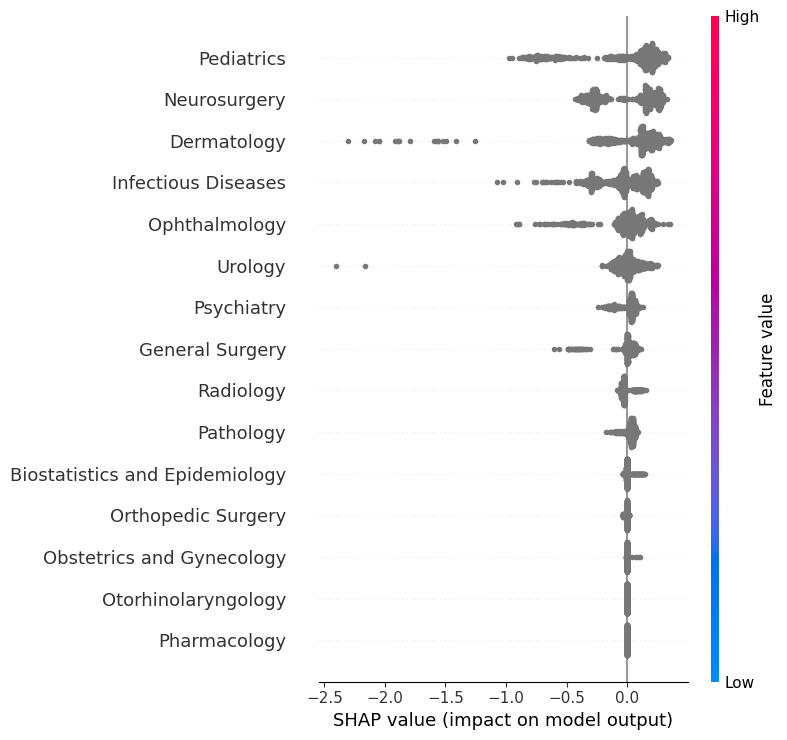

In [ ]:
shap.summary_plot(shap_values, X ,show=False)

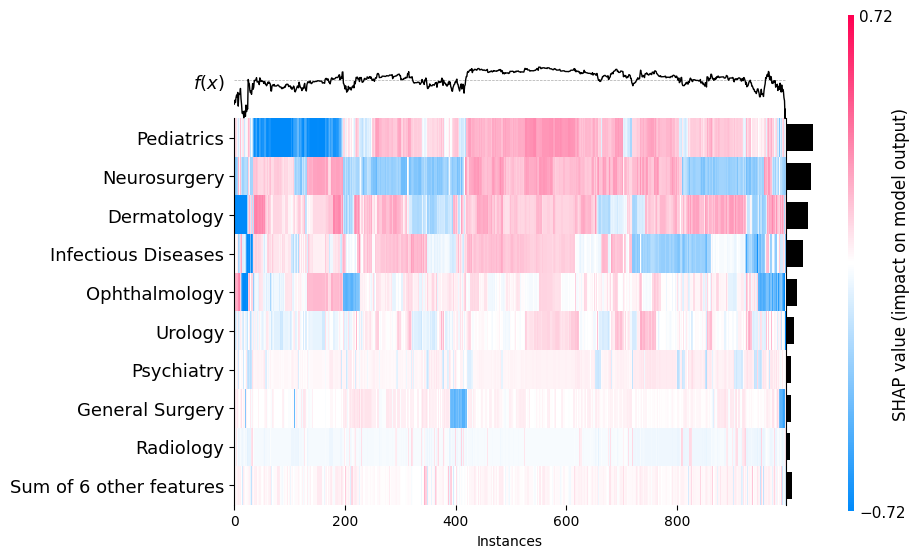

In [ ]:
shap.plots.heatmap(shap_values)

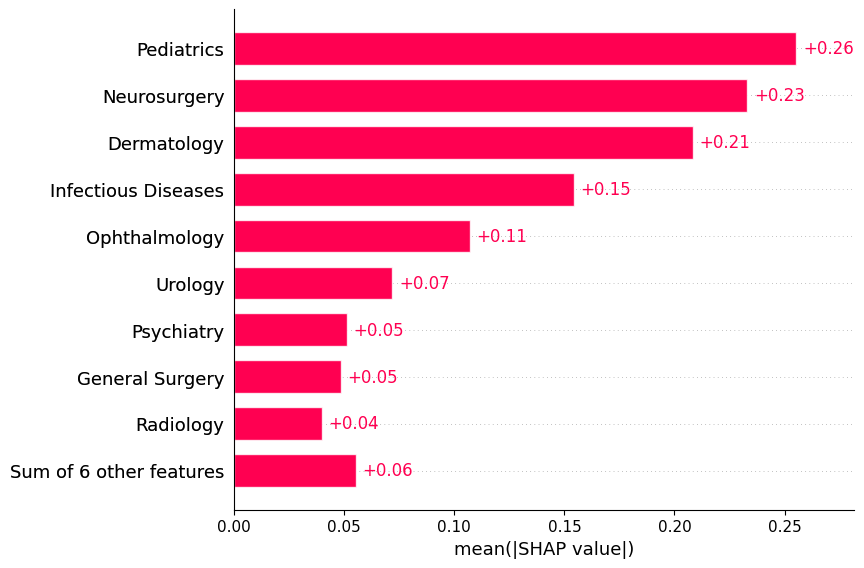

In [ ]:
shap.plots.bar(shap_values)

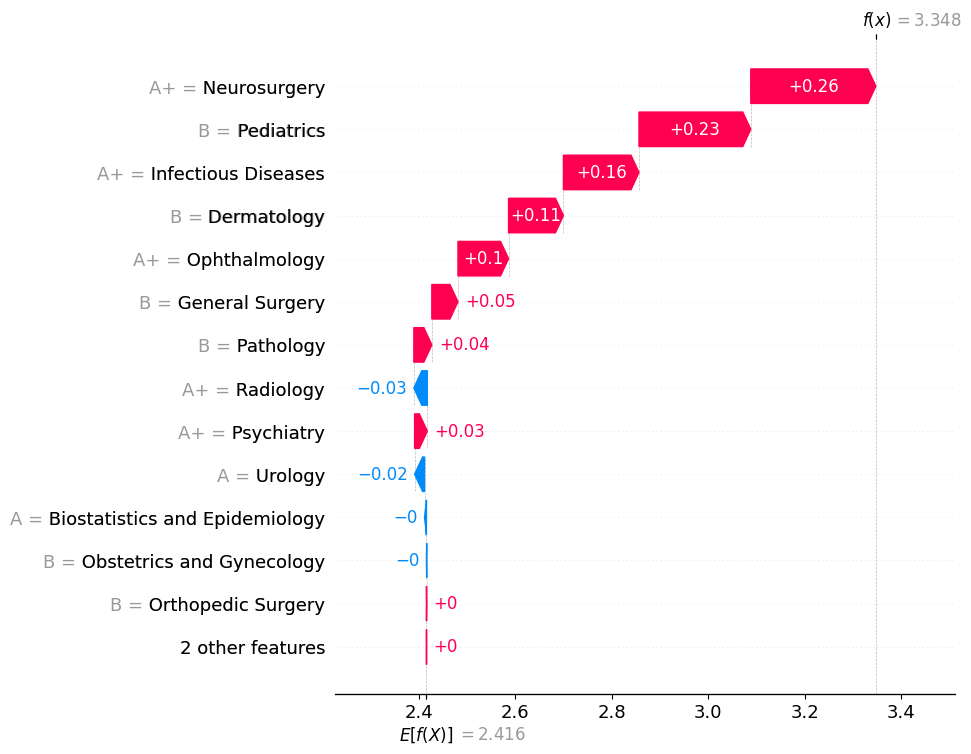

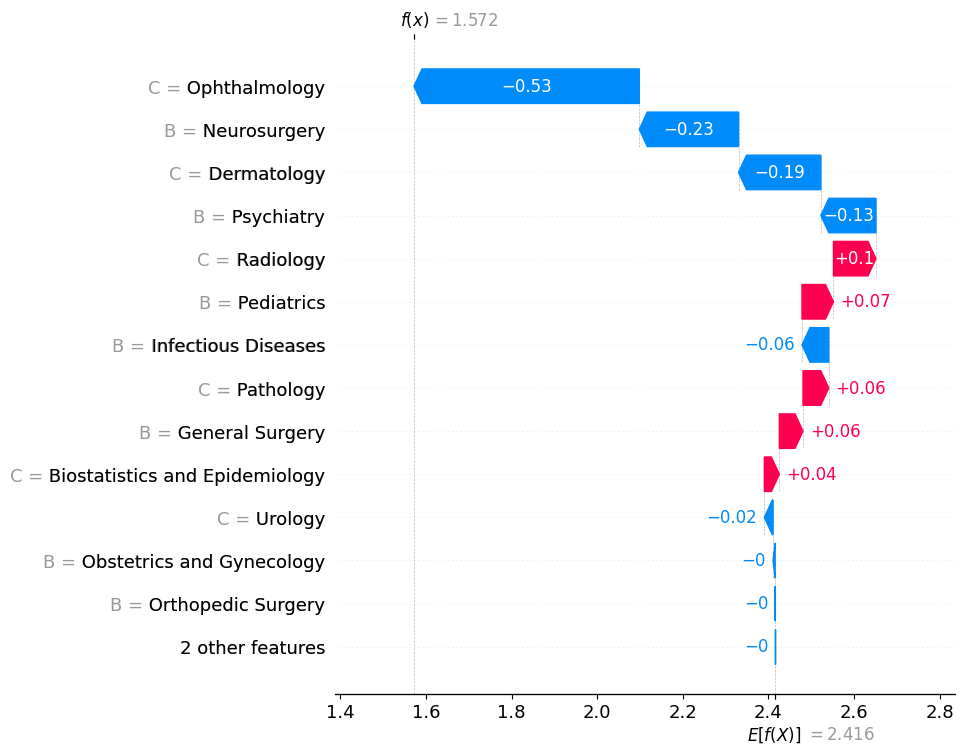

In [ ]:

shap.plots.waterfall(shap_values[50], max_display=14)
shap.plots.waterfall(shap_values[1], max_display=14)

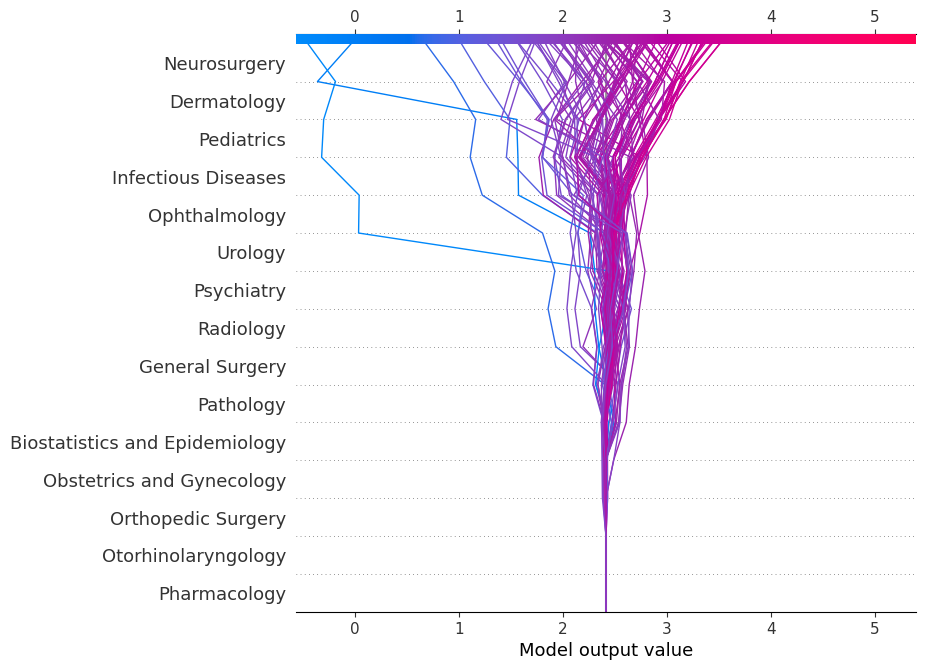

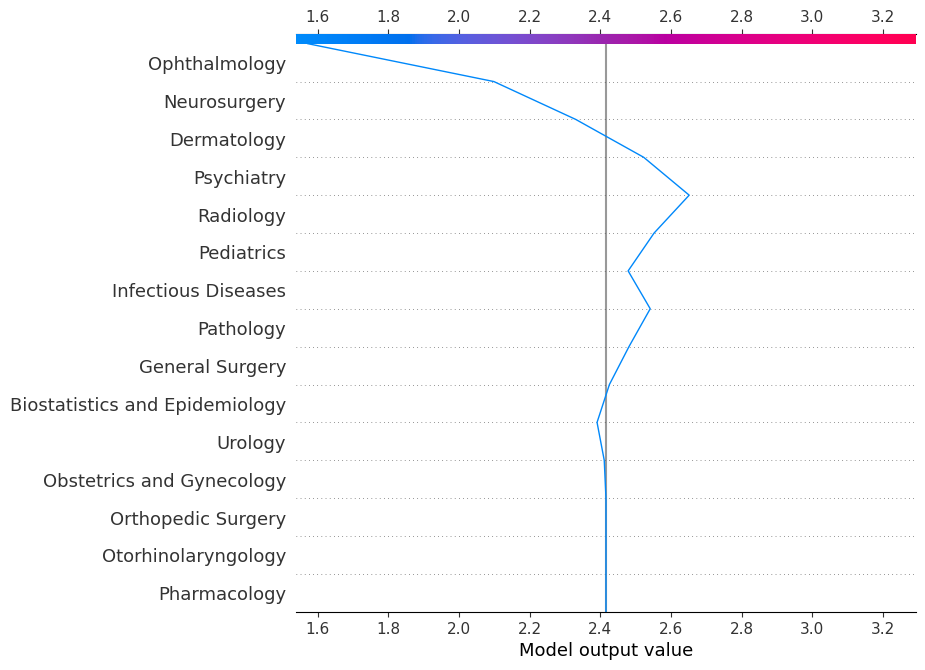

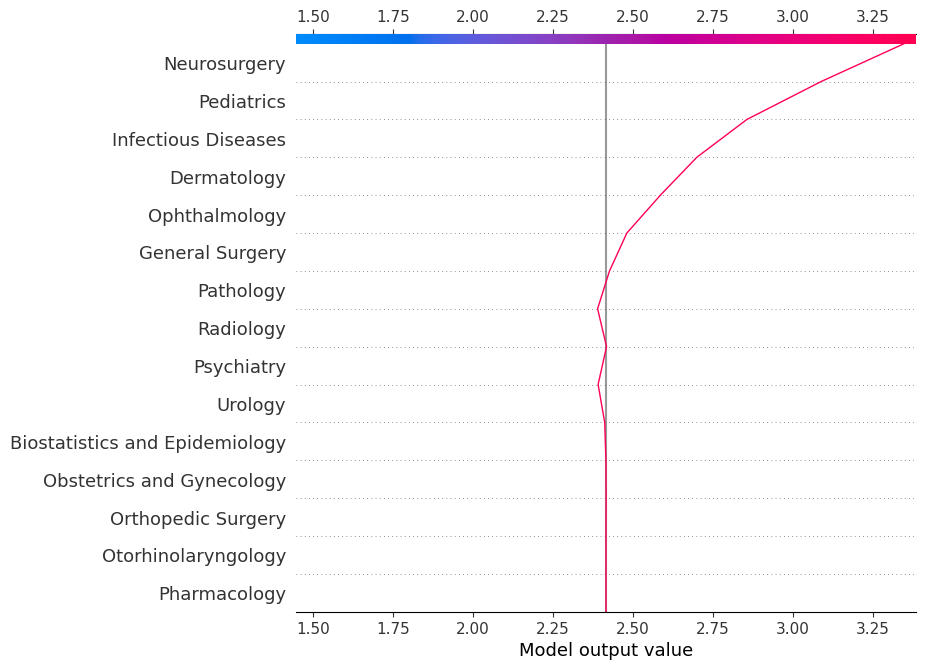

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(best_model)
base_value = explainer.expected_value
select = range(100)
features = X.iloc[select]
features_display = list(X.columns)
shap_values = explainer.shap_values(features)
base_value = explainer.expected_value
# Create the SHAP decision plot with the label of the target class displayed
shap.decision_plot(base_value, shap_values, features=features_display)
shap.decision_plot(base_value, shap_values[1], features=features_display)
shap.decision_plot(base_value, shap_values[50], features=features_display)

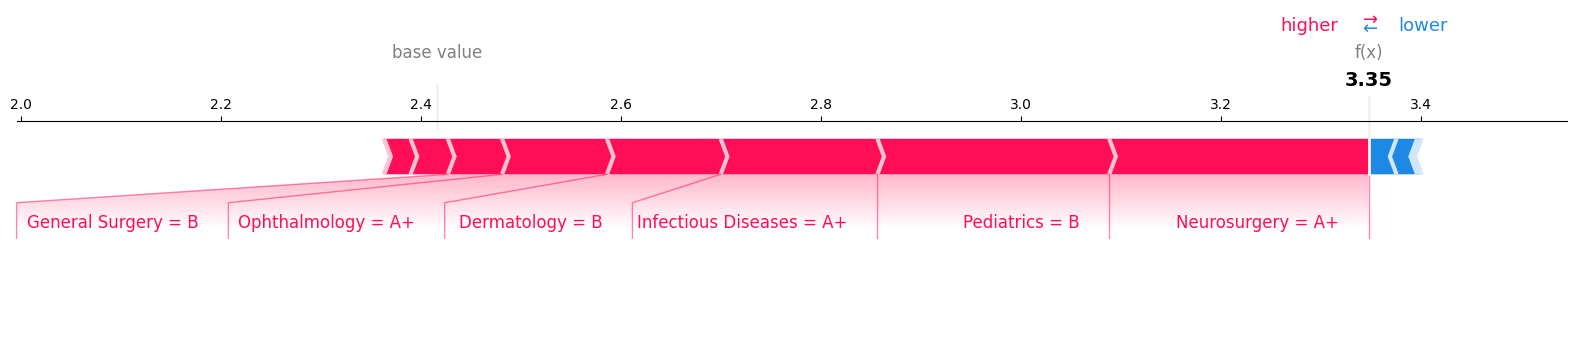

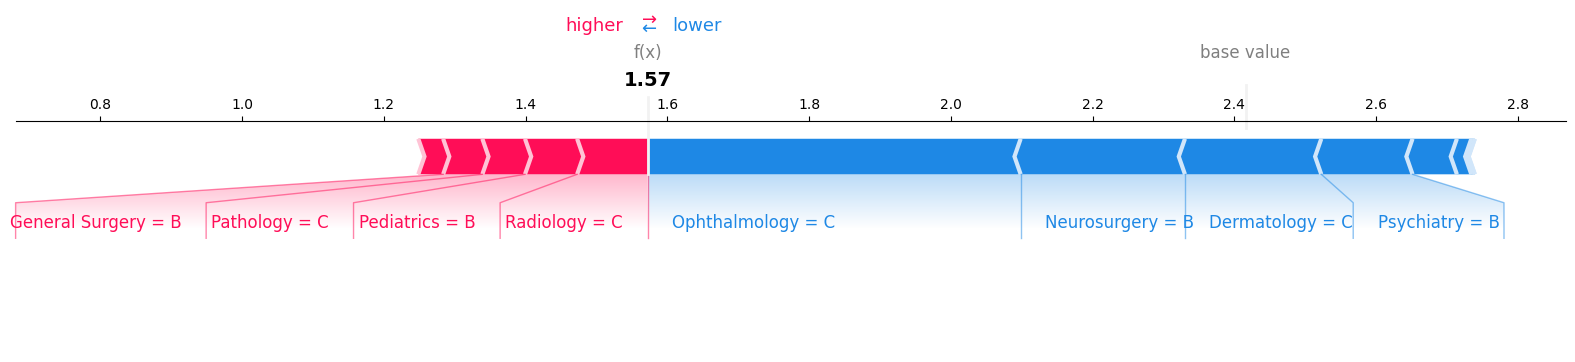

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
shap.initjs()
import shap
# visualize the first 5 predictions explanations with a dark red dark blue color map
explanation = explainer(X)
shap.plots.force(explanation[50],  matplotlib=True)
shap.plots.force(explanation[1],  matplotlib=True)

In [ ]:
##### 2 state
x_all_1=data.iloc[:,1:5]
x_all_2=data.iloc[:,6:27]
y_all=data["CMPIE Status"].values
one_hot_encoder=OneHotEncoder(drop="first") # two state one state drop
onehot_x1=one_hot_encoder.fit_transform(x_all_1).toarray()
newcol=one_hot_encoder.get_feature_names_out()
data_1=pd.DataFrame(onehot_x1,columns=newcol)
data_1.info()
one_hot_encoder=OneHotEncoder()
onehot_x1=one_hot_encoder.fit_transform(x_all_2).toarray()
newcol=one_hot_encoder.get_feature_names_out()
data_2=pd.DataFrame(onehot_x1,columns=newcol)
data_2.info()
one_hot_encoder=OneHotEncoder(drop="first")
onehot_xT=one_hot_encoder.fit_transform(y_all.reshape(-1,1)).toarray()
newcol=one_hot_encoder.get_feature_names_out()
data_T=pd.DataFrame(data=onehot_xT,columns=newcol)
result = pd.concat([data_1, data_2,data_T], axis=1)
for column in result.columns:
    result[column] = result[column].astype('int')
result.to_csv(address+'onhot_results.csv', index=False)
print(result.sum())
print(result.shape[0])
print(result.shape[1])
selected_cols = []
for col in result.columns:
    prop_true = result[col].sum()/result.shape[0]
    if prop_true < 0.01:
      print(f"Column '{col}' has less than 1% True values ({prop_true:.2%})")
      selected_cols.append(col)
print(selected_cols)

df_Xarray=result.iloc[:,:-1].values
df_Yarray=result.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(df_Xarray,df_Yarray,test_size=0.33, random_state=42,shuffle=True)
print(X_train.shape)
print(result.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender_Male                       997 non-null    float64
 1   Residency Status_Resident         997 non-null    float64
 2   Entrance Semester_Spring          997 non-null    float64
 3   Type of Admission_Tuition Paying  997 non-null    float64
dtypes: float64(4)
memory usage: 31.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Columns: 102 entries, General Surgery_A to Age at CMPIE_Below 25
dtypes: float64(102)
memory usage: 794.6 KB
Gender_Male                         450
Residency Status_Resident           479
Entrance Semester_Spring            516
Type of Admission_Tuition Paying    145
General Surgery_A                   195
                                   ... 
Age at Entrance_Below 20            896
Age at CMPIE_25 



counter_aresamble :   0    889
1    539
Name: target, dtype: int64


<ipython-input-4-69ef24a6318d>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_names, rotation=90, fontsize=12)


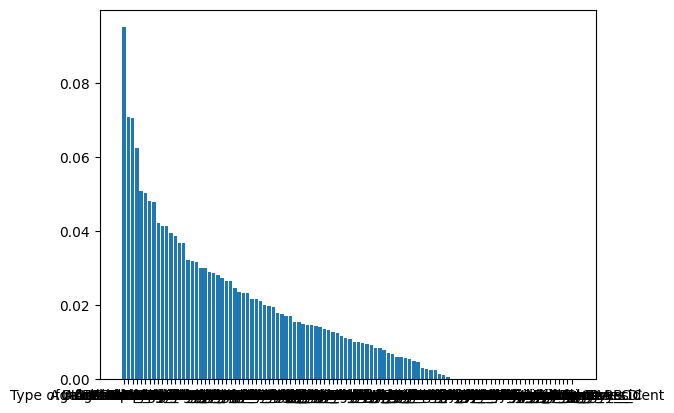

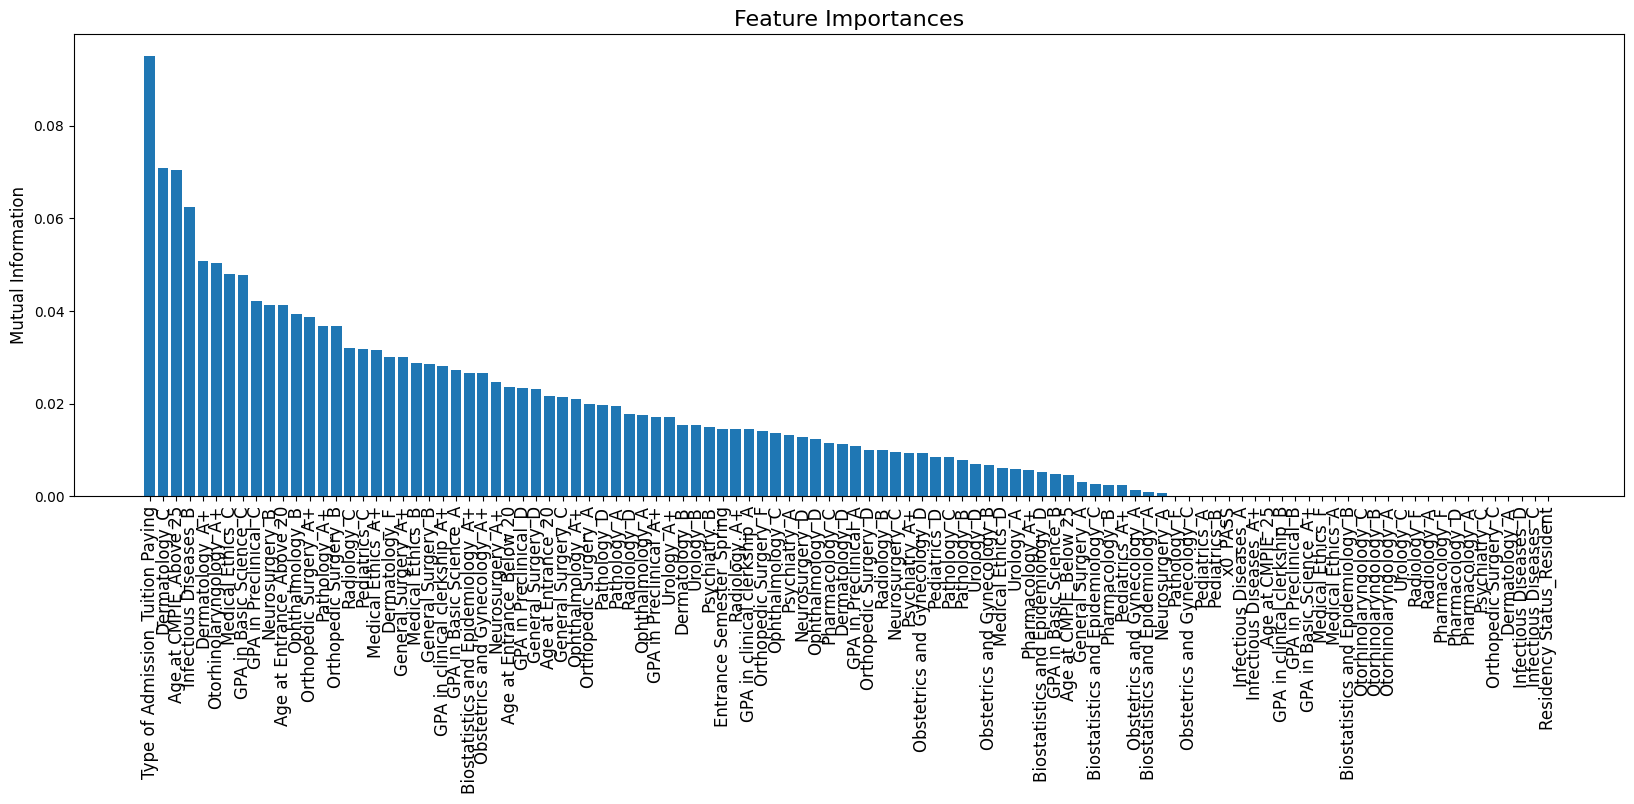

Percentage of 0s: 61.86440677966102
Percentage of 1s: 38.13559322033898


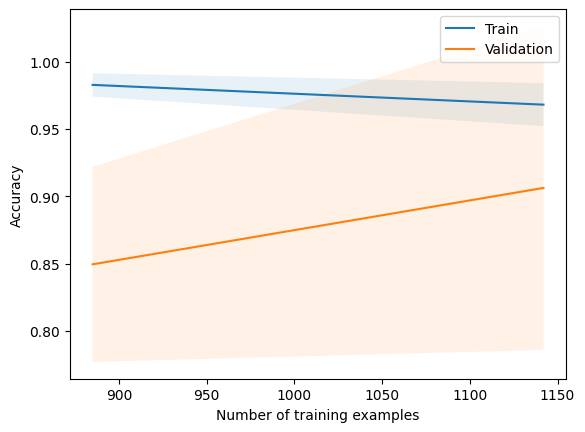

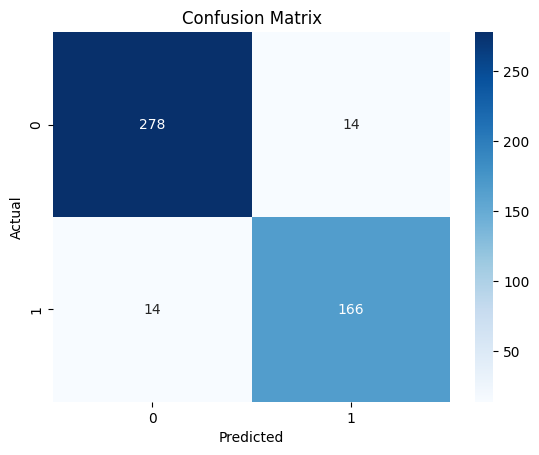

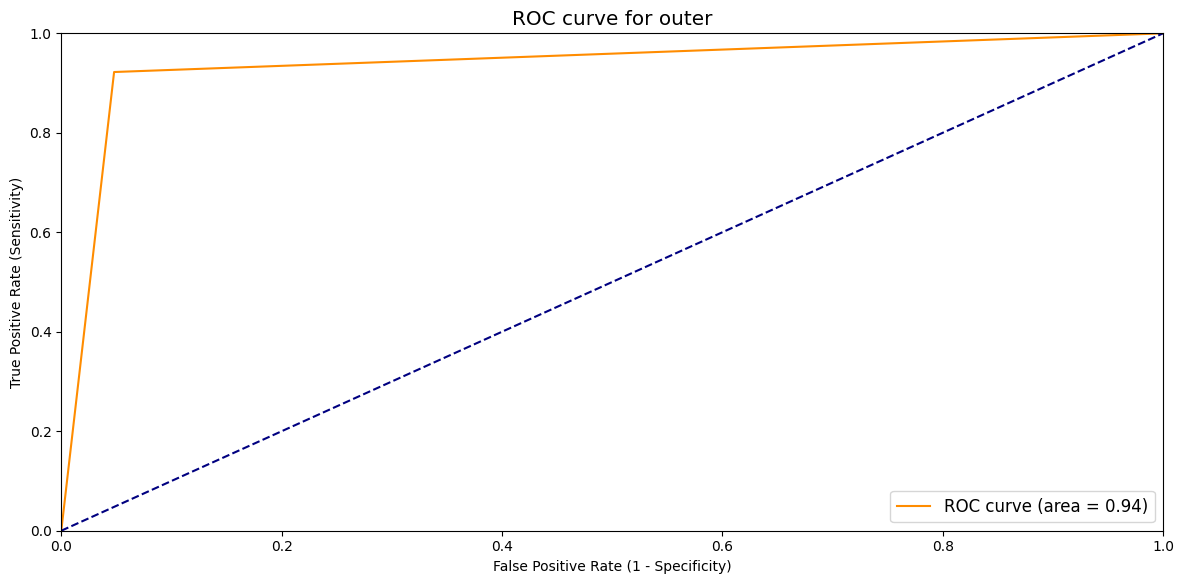

FSCOR 0 :  0.952054794520548
RECALL 0 :  0.952054794520548
PRECISION 0 :  0.952054794520548
FSCOR 1 :  0.9222222222222223
RECALL 1 :  0.9222222222222223
PRECISION 1 :  0.9222222222222223
Test set metrics:
Accuracy: 0.940677966101695
Precision: 0.9222222222222223
Recall: 0.9222222222222223
F1 score: 0.9222222222222223
Specificity: 0.952054794520548
sensitivity: 0.9222222222222223
AUC: 0.9371385083713851
Train set metrics:
Accuracy: 0.9748953974895398
Precision: 0.9514824797843666
Recall: 0.9832869080779945
F1 score: 0.9671232876712329
Specificity: 0.9698492462311558
sensitivity: 0.9832869080779945
AUC: 0.9765680771545752
Overfitting check (between the test and train sets should be less than 5%):
Accuracy difference: 0.03421743138784483
Precision difference: 0.029260257562144343
Recall difference: 0.06106468585577218
F1 score difference: 0.044901065449010624
Specificity difference: 0.017794451710607784
Sensitivity difference: 0.06106468585577218
AUC difference: 0.03942956878319004


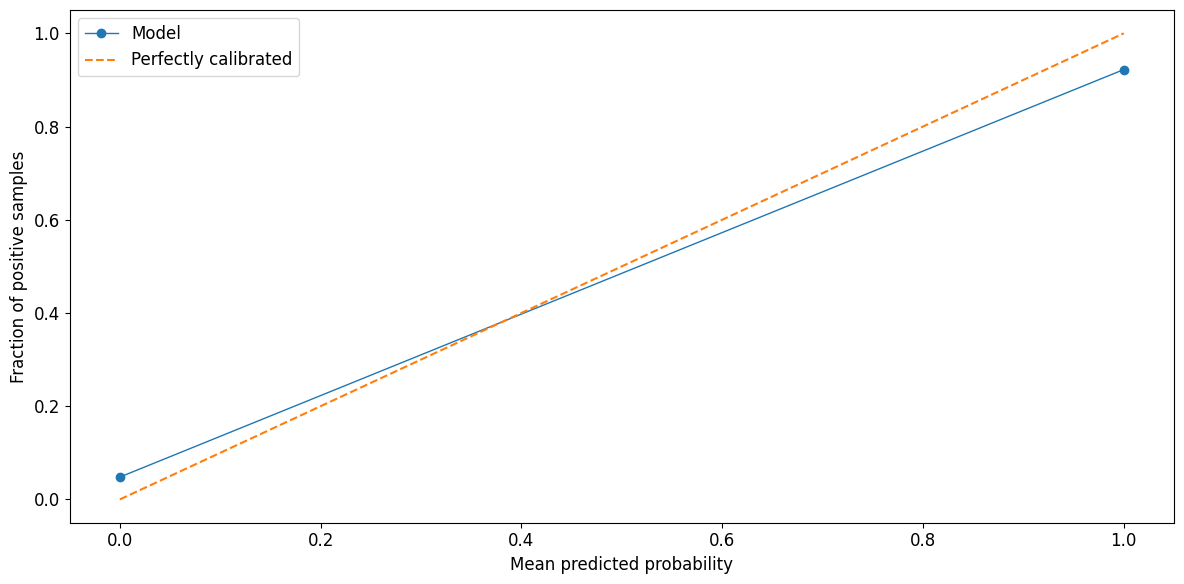

<Figure size 1200x600 with 0 Axes>

In [ ]:
#from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTEN
#from imblearn.over_sampling import KMeansSMOTE
#from imblearn.over_sampling import SMOTE, ADASYN
#from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,auc,roc_curve,RocCurveDisplay
from sklearn.linear_model import LogisticRegression

from imblearn.combine import SMOTEENN
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

resamble = SMOTEENN(random_state=0)
X_r,Y_r=resamble.fit_resample(df_Xarray,df_Yarray)
c1=result.columns[1:]
df_os=pd.DataFrame(X_r,columns=c1)
df_os["target"]=Y_r
counter_Aresamble = df_os.iloc[:,-1].value_counts()
print("\n")
print("counter_aresamble :  ",counter_Aresamble)
df_Xarray=df_os.iloc[:,:-1].values
df_Yarray=df_os.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(df_Xarray,df_Yarray,test_size=0.33, random_state=42,shuffle=True)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classes = classifier.classes_
y_pred = classifier.predict(X_test)


# Compute the mutual information between each feature and the target variable
mi = mutual_info_classif(X_train, y_train)
# Sort the feature importances in descending order
sorted_idx = np.argsort(mi)[::-1]
sorted_names = c1[sorted_idx]
sorted_mi = mi[sorted_idx]
# Create a bar chart of the sorted feature importances
fig, ax = plt.subplots()
ax.bar(sorted_names, sorted_mi)
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(sorted_names, sorted_mi)
ax.set_xticklabels(sorted_names, rotation=90, fontsize=12)
ax.set_ylabel('Mutual Information', fontsize=12)
ax.set_title('Feature Importances', fontsize=16)
plt.show()
plt.savefig(address+"Feature Importances.png", dpi=300, bbox_inches="tight")

counts = np.bincount(y_test)

num_zeros = counts[0]
num_ones = counts[1]

total = len(y_test)
percent_zeros = num_zeros / total * 100
percent_ones = num_ones / total * 100

print("Percentage of 0s:", percent_zeros)
print("Percentage of 1s:", percent_ones)


from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# X and y are the input features and labels, respectively
# model is the classification model to be trained
train_sizes, train_scores, test_scores = learning_curve(classifier, df_Xarray,df_Yarray, cv=5)
# Calculate mean and standard deviation of train and test scores across CV folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Train')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig(address+"auc_learning_curve_smote.png", dpi=300, bbox_inches="tight")

plt.rcParams["figure.figsize"] = [12.00, 6] ## سن امتحان حذف درس اخلاق
plt.rcParams["figure.autolayout"] = True
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUC=auc(fpr, tpr)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig(address+"confusion_smote.png", dpi=300, bbox_inches="tight")



plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for outer')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
plt.savefig(address+"auc_out_smote.png", dpi=300, bbox_inches="tight")

Accuracy = accuracy_score(y_test, y_pred) * 100
FSCORE=f1_score(y_test, y_pred, average=None)
RECALL=recall_score(y_test, y_pred, average=None)
PRECISION=precision_score(y_test, y_pred, average=None)
for i in range(len(classes)):
      print("FSCOR", classes[i], ": ",FSCORE[i])
      print("RECALL", classes[i], ": ",RECALL[i])
      print("PRECISION", classes[i], ": ",PRECISION[i])

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# True labels and predicted labels for test set
y_true_train = y_train
y_pred_train = classifier.predict(X_train)
    # True labels and predicted labels for train set
y_true_test = y_test
y_pred_test = classifier.predict(X_test)# predicted labels for train set
    # Calculate accuracy, precision, recall, F1 score, specificity, and AUC for test set
accuracy_test = accuracy_score(y_true_test, y_pred_test)
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_score_test = f1_score(y_true_test, y_pred_test)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_true_test, y_pred_test).ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
auc_test = roc_auc_score(y_true_test, y_pred_test)
    # Calculate accuracy, precision, recall, F1 score, specificity, and AUC for train set
accuracy_train = accuracy_score(y_true_train, y_pred_train)
precision_train = precision_score(y_true_train, y_pred_train)
recall_train = recall_score(y_true_train, y_pred_train)
f1_score_train = f1_score(y_true_train, y_pred_train)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_true_train, y_pred_train).ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)
auc_train = roc_auc_score(y_true_train, y_pred_train)
# Print the evaluation metrics
print("Test set metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 score:", f1_score_test)
print("Specificity:", specificity_test)
print("sensitivity:", sensitivity_test)
print("AUC:", auc_test)
print("Train set metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 score:", f1_score_train)
print("Specificity:", specificity_train)
print("sensitivity:", sensitivity_train)
print("AUC:", auc_train)

# Check for overfitting by comparing metrics of test and train sets
#One common rule of thumb is that the difference in performance metrics between the test and train sets should be less than 5%.
print("Overfitting check (between the test and train sets should be less than 5%):")
print("Accuracy difference:", np.abs(accuracy_test - accuracy_train))
print("Precision difference:", np.abs(precision_test - precision_train))
print("Recall difference:", np.abs(recall_test - recall_train))
print("F1 score difference:", np.abs(f1_score_test - f1_score_train))
print("Specificity difference:", np.abs(specificity_test - specificity_train))
print("Sensitivity difference:", abs(sensitivity_test - sensitivity_train))
print("AUC difference:", np.abs(auc_test - auc_train))

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
# y_true is the true labels for the test set, and y_probs is the predicted probabilities
y_true = y_test# true labels for test set
y_probs = y_pred # predicted probabilities for test set
# Calculate calibration curve
frac_pos, mean_pred = calibration_curve(y_true, y_probs, n_bins=10)
# Plot calibration curve
plt.plot(mean_pred, frac_pos, marker='o', linewidth=1, label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positive samples')
plt.legend()
plt.show()
plt.savefig(address+"calibration curve_stacking_smote.png", dpi=300, bbox_inches="tight")

Stacking model:
accuracy: 0.962 +/- 0.028
f1: 0.950 +/- 0.039
precision: 0.952 +/- 0.026
recall: 0.949 +/- 0.067
roc_auc: 0.992 +/- 0.009
rf
accuracy: 0.923 +/- 0.030
f1: 0.888 +/- 0.049
precision: 0.974 +/- 0.021
recall: 0.817 +/- 0.079
roc_auc: 0.983 +/- 0.014
xgb
accuracy: 0.962 +/- 0.026
f1: 0.949 +/- 0.035
precision: 0.949 +/- 0.028
recall: 0.949 +/- 0.056
roc_auc: 0.994 +/- 0.006
ADA
accuracy: 0.840 +/- 0.036
f1: 0.742 +/- 0.068
precision: 0.941 +/- 0.059
recall: 0.614 +/- 0.087
roc_auc: 0.939 +/- 0.027
Stacking model: 0.975


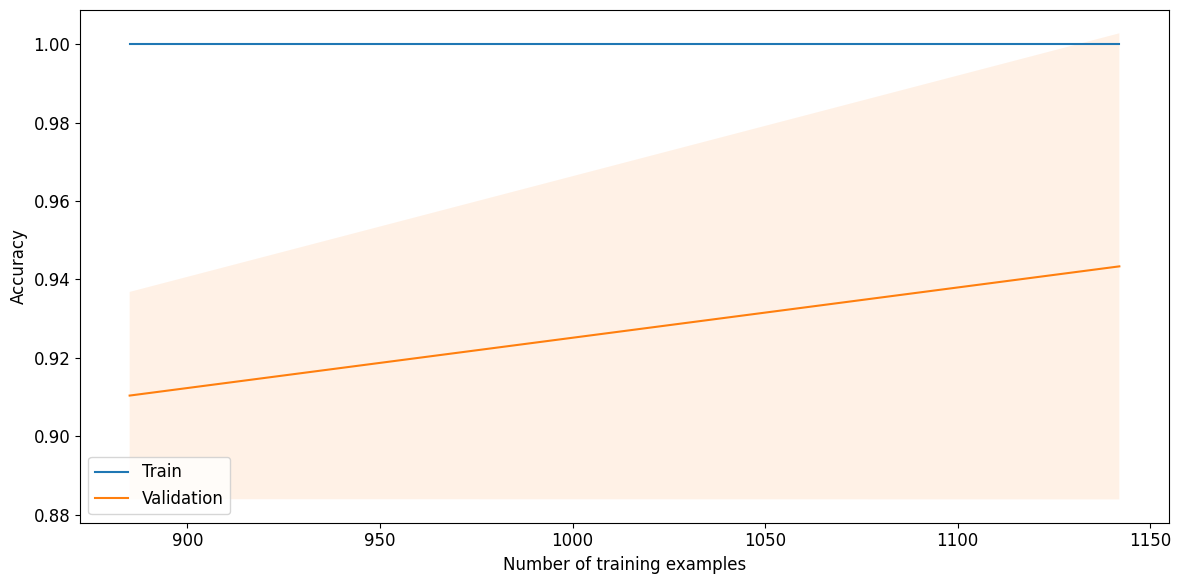

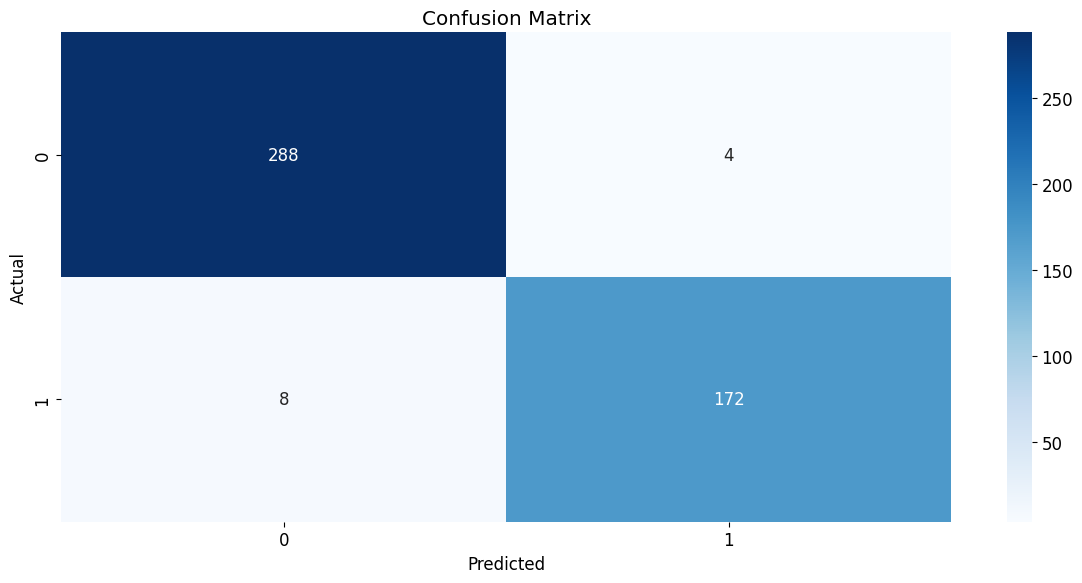

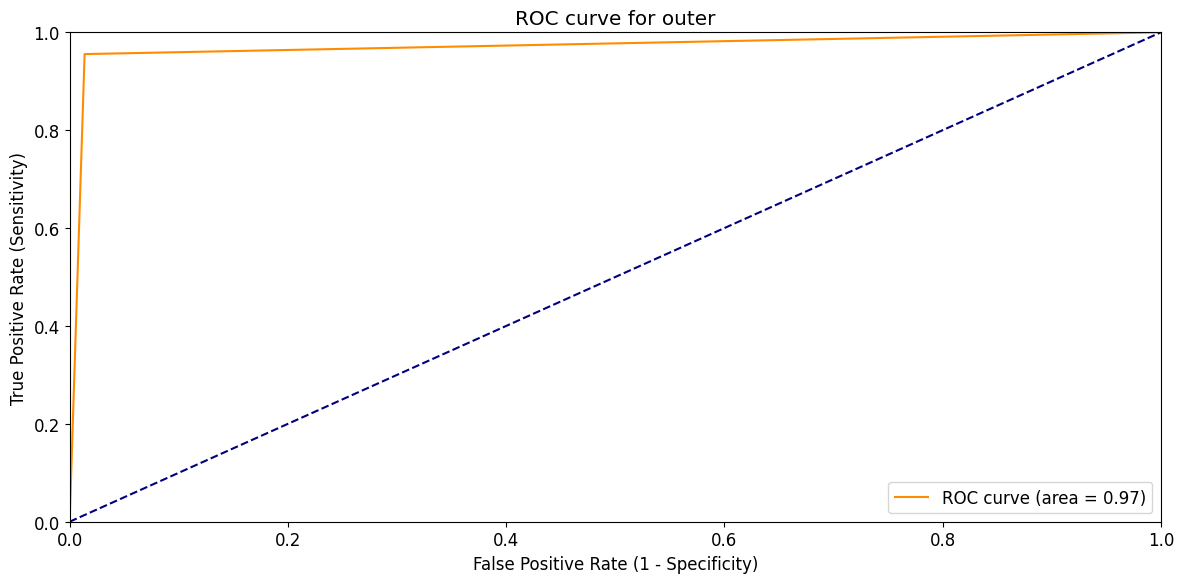

FSCOR 0 :  0.979591836734694
RECALL 0 :  0.9863013698630136
PRECISION 0 :  0.972972972972973
FSCOR 1 :  0.9662921348314608
RECALL 1 :  0.9555555555555556
PRECISION 1 :  0.9772727272727273
Test set metrics:
Accuracy: 0.9745762711864406
Precision: 0.9772727272727273
Recall: 0.9555555555555556
F1 score: 0.9662921348314608
Specificity: 0.9863013698630136
sensitivity: 0.9555555555555556
AUC: 0.9709284627092847
Train set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Specificity: 1.0
sensitivity: 1.0
AUC: 1.0
Overfitting check (between the test and train sets should be less than 5%):
Accuracy difference: 0.025423728813559365
Precision difference: 0.022727272727272707
Recall difference: 0.0444444444444444
F1 score difference: 0.033707865168539186
Specificity difference: 0.013698630136986356
Sensitivity difference: 0.0444444444444444
AUC difference: 0.02907153729071532


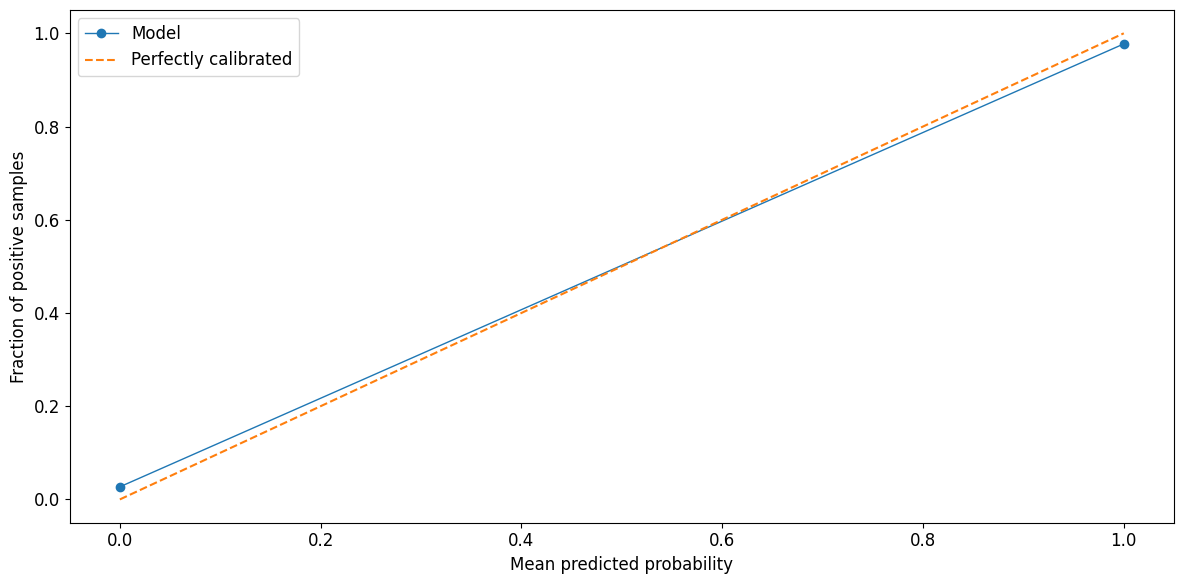

<Figure size 1200x600 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


# Define the base models
models = [
    ('rf', RandomForestClassifier(random_state=42, max_depth=5,min_samples_leaf=5,n_estimators=100)),
    #('gb', GradientBoostingClassifier(random_state=42, max_depth=5)),
      ('xgb', XGBClassifier(random_state=42, max_depth=5,n_estimators=100)),
      ('ADA',AdaBoostClassifier(algorithm= 'SAMME',learning_rate= 0.1,n_estimators=100))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Define the stacking model
stacking_model = make_pipeline(
    StandardScaler(),
    StackingClassifier(
        estimators=models,
        final_estimator=meta_model,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        stack_method='predict_proba',
    )
)
#---------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_Xarray,df_Yarray,test_size=0.33, random_state=42,shuffle=True)
#stacking_scores = cross_val_score(stacking_model, X_train, y_train, cv=5)
#----------------------------------------------------------------------------------------------------------------
# Load the dataset
X, y = df_Xarray, df_Yarray

# Define the outer cross-validation loop
outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Define the inner cross-validation loop
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics to evaluate
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

# Evaluate the stacking model using nested cross-validation
stacking_scores = cross_validate(stacking_model, X, y, cv=outer_cv, scoring=scoring)

# Print the results
print('Stacking model:')
for metric in scoring:
    scores = stacking_scores[f'test_{metric}']
    print(f'{metric}: {scores.mean():.3f} +/- {2*scores.std():.3f}')

# Evaluate the base models using cross-validation (train)
base_scores = []
for name, model in models:
    base_scores = cross_validate(model, X, y, cv=outer_cv, scoring=scoring)
    print(name)
    for metric in scoring:
        scores = base_scores[f'test_{metric}']
        print(f'{metric}: {scores.mean():.3f} +/- {2*scores.std():.3f}')

#------------------------------------------------------------------------------------------------------------------------------

classifier = stacking_model
classifier.fit(X_train, y_train)
classes = classifier.classes_
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Stacking model: {score.mean():.3f}')

#-----------------------------------------------------------


#-----------------------------------------------------------

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# X and y are the input features and labels, respectively
# model is the classification model to be trained
train_sizes, train_scores, test_scores = learning_curve(classifier, df_Xarray,df_Yarray, cv=5)
# Calculate mean and standard deviation of train and test scores across CV folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Train')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig(address+"auc_learning_curve_smote_stacking.png", dpi=300, bbox_inches="tight")

plt.rcParams["figure.figsize"] = [12.00, 6] ## سن امتحان حذف درس اخلاق
plt.rcParams["figure.autolayout"] = True
fpr, tpr, _ = roc_curve(y_test, y_pred)
from sklearn import metrics
AUC=metrics.auc(fpr, tpr)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig(address+"confusion_smote_stacking.png", dpi=300, bbox_inches="tight")


plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for outer')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
plt.savefig(address+"auc__smote_stacking.png", dpi=300, bbox_inches="tight")

Accuracy = accuracy_score(y_test, y_pred) * 100
FSCORE=f1_score(y_test, y_pred, average=None)
RECALL=recall_score(y_test, y_pred, average=None)
PRECISION=precision_score(y_test, y_pred, average=None)
for i in range(len(classes)):
      print("FSCOR", classes[i], ": ",FSCORE[i])
      print("RECALL", classes[i], ": ",RECALL[i])
      print("PRECISION", classes[i], ": ",PRECISION[i])

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# True labels and predicted labels for test set
y_true_train = y_train
y_pred_train = classifier.predict(X_train)
    # True labels and predicted labels for train set
y_true_test = y_test
y_pred_test = classifier.predict(X_test)# predicted labels for train set
    # Calculate accuracy, precision, recall, F1 score, specificity, and AUC for test set
accuracy_test = accuracy_score(y_true_test, y_pred_test)
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_score_test = f1_score(y_true_test, y_pred_test)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_true_test, y_pred_test).ravel()
specificity_test = tn_test / (tn_test + fp_test)
sensitivity_test = tp_test / (tp_test + fn_test)
auc_test = roc_auc_score(y_true_test, y_pred_test)
    # Calculate accuracy, precision, recall, F1 score, specificity, and AUC for train set
accuracy_train = accuracy_score(y_true_train, y_pred_train)
precision_train = precision_score(y_true_train, y_pred_train)
recall_train = recall_score(y_true_train, y_pred_train)
f1_score_train = f1_score(y_true_train, y_pred_train)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_true_train, y_pred_train).ravel()
specificity_train = tn_train / (tn_train + fp_train)
sensitivity_train = tp_train / (tp_train + fn_train)
auc_train = roc_auc_score(y_true_train, y_pred_train)
# Print the evaluation metrics
print("Test set metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 score:", f1_score_test)
print("Specificity:", specificity_test)
print("sensitivity:", sensitivity_test)
print("AUC:", auc_test)

print("Train set metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 score:", f1_score_train)
print("Specificity:", specificity_train)
print("sensitivity:", sensitivity_train)
print("AUC:", auc_train)

# Check for overfitting by comparing metrics of test and train sets
#One common rule of thumb is that the difference in performance metrics between the test and train sets should be less than 5%.
print("Overfitting check (between the test and train sets should be less than 5%):")
print("Accuracy difference:", np.abs(accuracy_test - accuracy_train))
print("Precision difference:", np.abs(precision_test - precision_train))
print("Recall difference:", np.abs(recall_test - recall_train))
print("F1 score difference:", np.abs(f1_score_test - f1_score_train))
print("Specificity difference:", np.abs(specificity_test - specificity_train))
print("Sensitivity difference:", abs(sensitivity_test - sensitivity_train))
print("AUC difference:", np.abs(auc_test - auc_train))

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
# y_true is the true labels for the test set, and y_probs is the predicted probabilities
y_true = y_test# true labels for test set
y_probs = y_pred # predicted probabilities for test set
# Calculate calibration curve
frac_pos, mean_pred = calibration_curve(y_true, y_probs, n_bins=10)
# Plot calibration curve
plt.plot(mean_pred, frac_pos, marker='o', linewidth=1, label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positive samples')
plt.legend()
plt.show()
plt.savefig(address+"calibration curve_smote_stacking.png", dpi=300, bbox_inches="tight")




In [ ]:
import pickle

# Train your model
# ...

# Save your trained model to a file
with open(address+"MHE.pkl", 'wb') as f:
    pickle.dump(classifier, f)